### 正则化
作用：防止过拟合
1. L1正则化：Lasso回归
2. L2正则化：Ridge回归
3. ElasticNet：弹性网回归

### 1. L1 正则化（Lasso 正则化）

L1 正则化通过在损失函数中添加一个与所有权重绝对值和成正比的惩罚项来实现。其损失函数可以表示为：

$$
L = \text{Loss} + \lambda \sum_{i} |w_i|
$$

其中：
- $\text{Loss}$ 是原始损失函数，例如均方误差（MSE）。
- $w_i$ 是模型的权重。
- $\lambda$ 是正则化强度的超参数。

L1 正则化的一个重要特性是，它会使一些权重变为零，从而实现特征选择。这样可以得到一个更稀疏的模型，更容易解释和分析。

直觉： L1 正则化通过惩罚绝对值较大的权重，会使一些权重变为零，从而选择少量重要的特征。可以想象成你在修剪一棵树，把多余的枝叶剪掉，只保留主要的枝干。

类比： 就像你在写一篇文章时，删除一些不必要的词语，只保留重要的内容。L1 正则化会把一些权重直接变为零，类似于把一些不重要的词语完全删除。


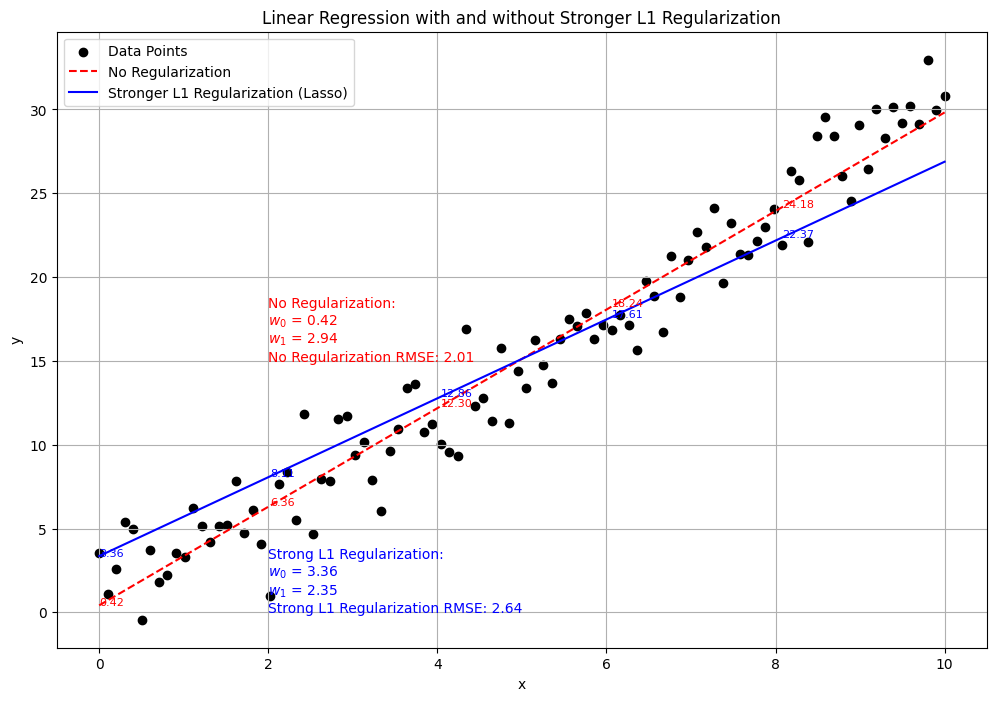

No Regularization RMSE: 2.01
Strong L1 Regularization RMSE: 2.64
正则化L1之后的拟合指标大于无正则化L1之后的拟合指标，说明L1正则化可以增大误差，从而减少过拟合。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(0)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * x.squeeze() + np.random.randn(100) * 2

# 无正则化的线性回归
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred_lin = lin_reg.predict(x)

# 强L1正则化（Lasso）的线性回归
lasso_reg_strongest = Lasso(alpha=5)
lasso_reg_strongest.fit(x, y)
y_pred_lasso_strongest = lasso_reg_strongest.predict(x)

# 计算RMSE
rmse_no_reg = np.sqrt(mean_squared_error(y, y_pred_lin))
rmse_lasso_strongest = np.sqrt(mean_squared_error(y, y_pred_lasso_strongest))

# 绘制图像
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, y_pred_lin, color='red', linestyle='--', label='No Regularization')
plt.plot(x, y_pred_lasso_strongest, color='blue', linestyle='-', label='Stronger L1 Regularization (Lasso)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with and without Stronger L1 Regularization')
plt.legend()
plt.grid(True)

# 添加权重和截距的标注
w0_no_reg = lin_reg.intercept_
w1_no_reg = lin_reg.coef_[0]

w0_lasso_strongest = lasso_reg_strongest.intercept_
w1_lasso_strongest = lasso_reg_strongest.coef_[0]

plt.text(2, 15, f'No Regularization:\n$w_{0}$ = {w0_no_reg:.2f}\n$w_{1}$ = {w1_no_reg:.2f}\nNo Regularization RMSE: {rmse_no_reg:.2f}', color='red')
plt.text(2, 0, f'Strong L1 Regularization:\n$w_{0}$ = {w0_lasso_strongest:.2f}\n$w_{1}$ = {w1_lasso_strongest:.2f}\nStrong L1 Regularization RMSE: {rmse_lasso_strongest:.2f}', color='blue')

# 输出前后的拟合值进行对比
for i in range(0, 100, 20):
    plt.text(x[i], y_pred_lin[i], f'{y_pred_lin[i]:.2f}', color='red', fontsize=8)
    plt.text(x[i], y_pred_lasso_strongest[i], f'{y_pred_lasso_strongest[i]:.2f}', color='blue', fontsize=8)

plt.show()

# 打印RMSE
print(f'No Regularization RMSE: {rmse_no_reg:.2f}')
print(f'Strong L1 Regularization RMSE: {rmse_lasso_strongest:.2f}')

print("正则化L1之后的拟合指标大于无正则化L1之后的拟合指标，说明L1正则化可以增大误差，从而减少过拟合。")



### 2. L2 正则化（Ridge 正则化）

L2 正则化通过在损失函数中添加一个与所有权重平方和成正比的惩罚项来实现。其损失函数可以表示为：

$$
L = \text{Loss} + \lambda \sum_{i} w_i^2
$$

其中：
- $\text{Loss}$ 是原始损失函数，例如均方误差（MSE）。
- $w_i$ 是模型的权重。
- $\lambda$ 是正则化强度的超参数。

L2 正则化的目的是使模型的权重尽可能小，但不至于为零，从而避免过拟合，同时保持模型的复杂度适中。

直觉： L2 正则化通过惩罚较大的权重，使模型更平滑和简单。可以想象成拉紧橡皮筋，让权重不至于过大或波动过大。

类比： 就像一条线段穿过许多点，如果你试图让线段平滑通过所有点，你可能会得到一条曲折的线。而L2正则化就像是在这条线段上加了橡皮筋，让它不至于过于弯曲。


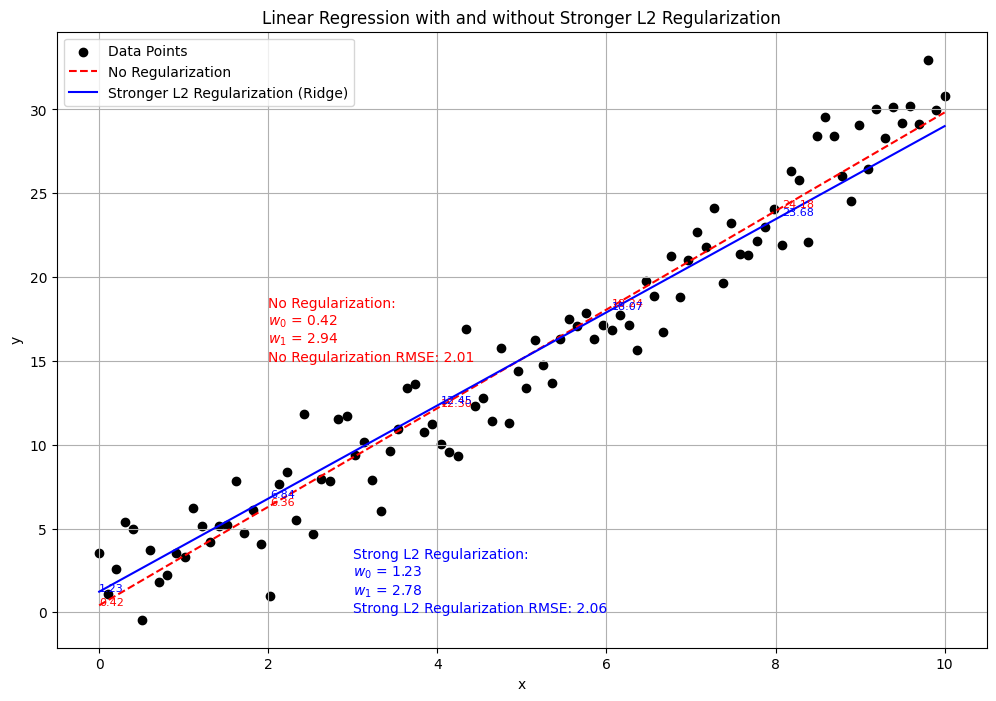

No Regularization RMSE: 2.01
Stronger L2 Regularization RMSE: 2.06
正则化L2之后的拟合指标大于无正则化L2之后的拟合指标，说明L2正则化可以增大误差，从而减少过拟合。


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(0)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * x.squeeze() + np.random.randn(100) * 2

# 无正则化的线性回归
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred_lin = lin_reg.predict(x)

# 更强的L2正则化（Ridge）的线性回归
ridge_reg_stronger = Ridge(alpha=50.0, )  # 增大正则化强度
ridge_reg_stronger.fit(x, y)
y_pred_ridge_stronger = ridge_reg_stronger.predict(x)

# 计算RMSE
rmse_no_reg = np.sqrt(mean_squared_error(y, y_pred_lin))
rmse_ridge_stronger = np.sqrt(mean_squared_error(y, y_pred_ridge_stronger))

# 绘制图像
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, y_pred_lin, color='red', linestyle='--', label='No Regularization')
plt.plot(x, y_pred_ridge_stronger, color='blue', linestyle='-', label='Stronger L2 Regularization (Ridge)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with and without Stronger L2 Regularization')
plt.legend()
plt.grid(True)

# 添加权重和截距的标注
w0_no_reg = lin_reg.intercept_
w1_no_reg = lin_reg.coef_[0]

w0_ridge_stronger = ridge_reg_stronger.intercept_
w1_ridge_stronger = ridge_reg_stronger.coef_[0]

plt.text(2, 15, f'No Regularization:\n$w_{0}$ = {w0_no_reg:.2f}\n$w_{1}$ = {w1_no_reg:.2f}\nNo Regularization RMSE: {rmse_no_reg:.2f}', color='red')
plt.text(3, 0, f'Strong L2 Regularization:\n$w_{0}$ = {w0_ridge_stronger:.2f}\n$w_{1}$ = {w1_ridge_stronger:.2f}\nStrong L2 Regularization RMSE: {rmse_ridge_stronger:.2f}', color='blue')

# 输出前后的拟合值进行对比
for i in range(0, 100, 20):
    plt.text(x[i], y_pred_lin[i], f'{y_pred_lin[i]:.2f}', color='red', fontsize=8)
    plt.text(x[i], y_pred_ridge_stronger[i], f'{y_pred_ridge_stronger[i]:.2f}', color='blue', fontsize=8)

plt.show()

# 打印RMSE
print(f'No Regularization RMSE: {rmse_no_reg:.2f}')
print(f'Stronger L2 Regularization RMSE: {rmse_ridge_stronger:.2f}')

print("正则化L2之后的拟合指标大于无正则化L2之后的拟合指标，说明L2正则化可以增大误差，从而减少过拟合。")



### 3. 弹性网络（Elastic Net）

弹性网络结合了 L1 和 L2 正则化，通过在损失函数中添加一个由 L1 和 L2 正则化项线性组合而成的惩罚项。其损失函数可以表示为：

$$
L = \text{Loss} + \lambda_1 \sum_{i} |w_i| + \lambda_2 \sum_{i} w_i^2
$$

其中：
- $\text{Loss}$ 是原始损失函数，例如均方误差（MSE）。
- $w_i$ 是模型的权重。
- $\lambda_1$ 和 $\lambda_2$ 分别是 L1 和 L2 正则化强度的超参数。

弹性网络的优势在于，它结合了 L1 和 L2 正则化的优点，即既可以实现特征选择，又可以防止过拟合，从而得到一个更稳健的模型。

直觉： 弹性网络结合了L1和L2正则化的优点。它既可以防止权重过大（L2正则化），又可以进行特征选择（L1正则化）。可以想象成既使用了橡皮筋（L2）来拉紧权重，又使用了修剪工具（L1）来修剪不必要的特征。

类比： 就像在园艺中，你不仅需要修剪多余的枝叶（L1），还需要保持整体树形的平滑和美观（L2）。

### 直观理解：
- L1 正则化： 想象一个修剪工具，把一些不重要的特征（权重）直接剪掉，使模型更简单、更稀疏。
- L2 正则化： 想象一个橡皮筋模型，让每个权重都被橡皮筋拉紧，使它们不至于太大。
- 弹性网络： 想象同时使用橡皮筋和修剪工具，既保持模型平滑，又删除不重要的特征，从而得到一个更优的模型。

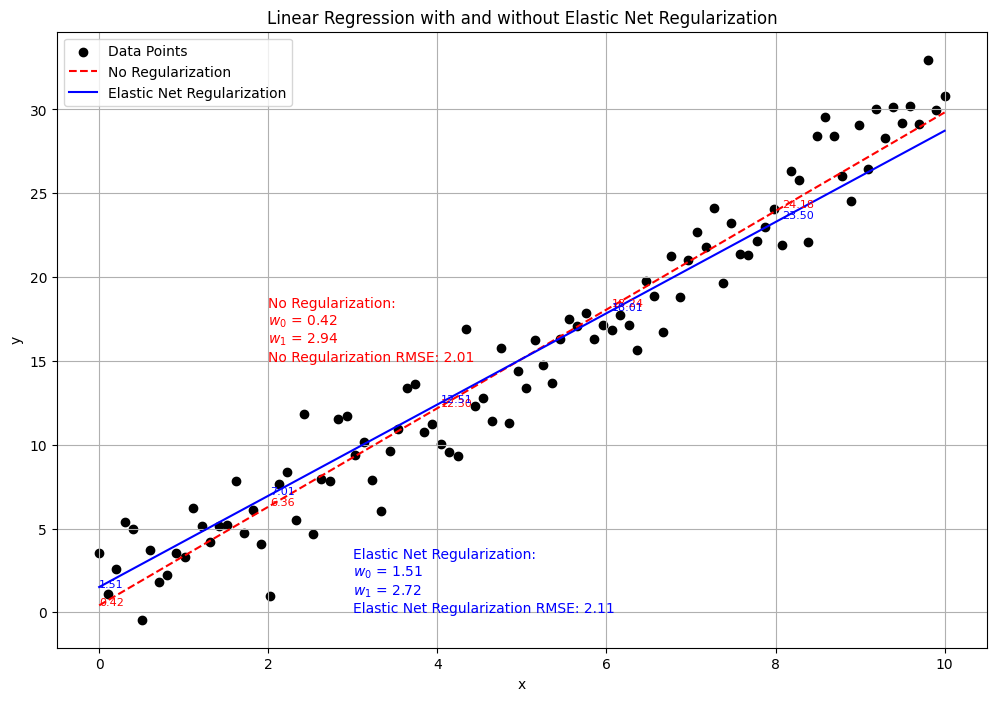

No Regularization RMSE: 2.01
Elastic Net Regularization RMSE: 2.11
弹性网络之后的拟合指标大于无正则化之后的拟合指标，说明弹性网络可以增大误差，从而减少过拟合。


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(0)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * x.squeeze() + np.random.randn(100) * 2

# 无正则化的线性回归
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred_lin = lin_reg.predict(x)

# L1+L2正则化（Elastic Net）的线性回归
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # 调整alpha和l1_ratio
elastic_net.fit(x, y)
y_pred_elastic_net = elastic_net.predict(x)

# 计算RMSE
rmse_no_reg = np.sqrt(mean_squared_error(y, y_pred_lin))
rmse_elastic_net = np.sqrt(mean_squared_error(y, y_pred_elastic_net))

# 绘制图像
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, y_pred_lin, color='red', linestyle='--', label='No Regularization')
plt.plot(x, y_pred_elastic_net, color='blue', linestyle='-', label='Elastic Net Regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with and without Elastic Net Regularization')
plt.legend()
plt.grid(True)

# 添加权重和截距的标注
w0_no_reg = lin_reg.intercept_
w1_no_reg = lin_reg.coef_[0]

w0_elastic_net = elastic_net.intercept_
w1_elastic_net = elastic_net.coef_[0]

plt.text(2, 15, f'No Regularization:\n$w_{0}$ = {w0_no_reg:.2f}\n$w_{1}$ = {w1_no_reg:.2f}\nNo Regularization RMSE: {rmse_no_reg:.2f}', color='red')
plt.text(3, 0, f'Elastic Net Regularization:\n$w_{0}$ = {w0_elastic_net:.2f}\n$w_{1}$ = {w1_elastic_net:.2f}\nElastic Net Regularization RMSE: {rmse_elastic_net:.2f}', color='blue')

# 输出前后的拟合值进行对比
for i in range(0, 100, 20):
    plt.text(x[i], y_pred_lin[i], f'{y_pred_lin[i]:.2f}', color='red', fontsize=8)
    plt.text(x[i], y_pred_elastic_net[i], f'{y_pred_elastic_net[i]:.2f}', color='blue', fontsize=8)

plt.show()

# 打印RMSE
print(f'No Regularization RMSE: {rmse_no_reg:.2f}')
print(f'Elastic Net Regularization RMSE: {rmse_elastic_net:.2f}')

print("弹性网络之后的拟合指标大于无正则化之后的拟合指标，说明弹性网络可以增大误差，从而减少过拟合。")

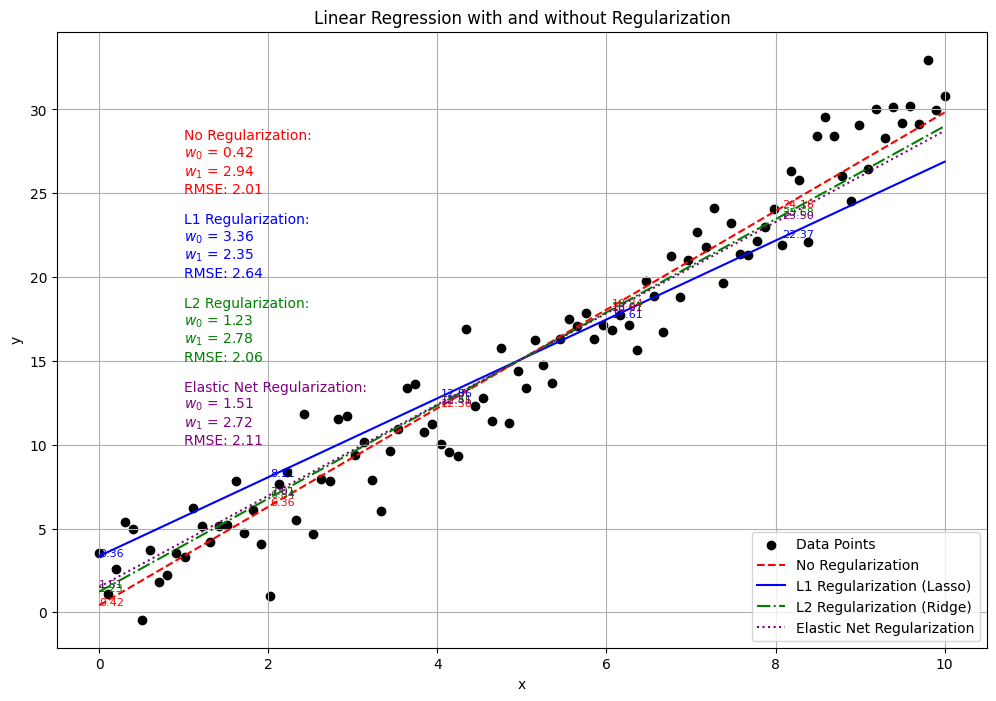

No Regularization RMSE: 2.01
L1 Regularization RMSE: 2.64
L2 Regularization RMSE: 2.06
Elastic Net Regularization RMSE: 2.11


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(0)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * x.squeeze() + np.random.randn(100) * 2

# 无正则化的线性回归
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred_lin = lin_reg.predict(x)

# L1正则化（Lasso）的线性回归
lasso_reg = Lasso(alpha=5.0)
lasso_reg.fit(x, y)
y_pred_lasso = lasso_reg.predict(x)

# L2正则化（Ridge）的线性回归
ridge_reg = Ridge(alpha=50)
ridge_reg.fit(x, y)
y_pred_ridge = ridge_reg.predict(x)

# L1+L2正则化（Elastic Net）的线性回归
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(x, y)
y_pred_elastic_net = elastic_net.predict(x)

# 计算RMSE
rmse_no_reg = np.sqrt(mean_squared_error(y, y_pred_lin))
rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
rmse_elastic_net = np.sqrt(mean_squared_error(y, y_pred_elastic_net))

# 绘制图像
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, y_pred_lin, color='red', linestyle='--', label='No Regularization')
plt.plot(x, y_pred_lasso, color='blue', linestyle='-', label='L1 Regularization (Lasso)')
plt.plot(x, y_pred_ridge, color='green', linestyle='-.', label='L2 Regularization (Ridge)')
plt.plot(x, y_pred_elastic_net, color='purple', linestyle=':', label='Elastic Net Regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with and without Regularization')
plt.legend()
plt.grid(True)

# 添加权重和截距的标注
w0_no_reg = lin_reg.intercept_
w1_no_reg = lin_reg.coef_[0]

w0_lasso = lasso_reg.intercept_
w1_lasso = lasso_reg.coef_[0]

w0_ridge = ridge_reg.intercept_
w1_ridge = ridge_reg.coef_[0]

w0_elastic_net = elastic_net.intercept_
w1_elastic_net = elastic_net.coef_[0]

plt.text(1, 25, f'No Regularization:\n$w_{0}$ = {w0_no_reg:.2f}\n$w_{1}$ = {w1_no_reg:.2f}\nRMSE: {rmse_no_reg:.2f}', color='red')
plt.text(1, 20, f'L1 Regularization:\n$w_{0}$ = {w0_lasso:.2f}\n$w_{1}$ = {w1_lasso:.2f}\nRMSE: {rmse_lasso:.2f}', color='blue')
plt.text(1, 15, f'L2 Regularization:\n$w_{0}$ = {w0_ridge:.2f}\n$w_{1}$ = {w1_ridge:.2f}\nRMSE: {rmse_ridge:.2f}', color='green')
plt.text(1, 10, f'Elastic Net Regularization:\n$w_{0}$ = {w0_elastic_net:.2f}\n$w_{1}$ = {w1_elastic_net:.2f}\nRMSE: {rmse_elastic_net:.2f}', color='purple')

# 输出前后的拟合值进行对比
for i in range(0, 100, 20):
    plt.text(x[i], y_pred_lin[i], f'{y_pred_lin[i]:.2f}', color='red', fontsize=8)
    plt.text(x[i], y_pred_lasso[i], f'{y_pred_lasso[i]:.2f}', color='blue', fontsize=8)
    plt.text(x[i], y_pred_ridge[i], f'{y_pred_ridge[i]:.2f}', color='green', fontsize=8)
    plt.text(x[i], y_pred_elastic_net[i], f'{y_pred_elastic_net[i]:.2f}', color='purple', fontsize=8)

plt.show()

# 打印RMSE
print(f'No Regularization RMSE: {rmse_no_reg:.2f}')
print(f'L1 Regularization RMSE: {rmse_lasso:.2f}')
print(f'L2 Regularization RMSE: {rmse_ridge:.2f}')
print(f'Elastic Net Regularization RMSE: {rmse_elastic_net:.2f}')

